In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import statsmodels.api as sm

# Data Cleaning

In [131]:
df = pd.read_excel('data.xlsx')
df

,id,group,quest_timing,fps_wk_hr,total_wk_hr,roleplay_wk_hr,strategy_wk_hr,years_play,gaming_ability_connection,media_reports,...,alt_2_RT,alt_1_correct,alt_2_correct,alt_mean_RT,alt_total_correct,digit_1_correct,digit_2_correct,digit_1_max,digit_2_max,average_digit_max
0,1,1,1,2,3,3,3,5,7,2,...,829.833333,21,21,950.062500,42,4,7,5,9,7.0
1,2,1,1,6,6,6,2,5,10,2,...,830.400417,23,22,1077.160313,45,7,5,7,7,7.0
2,3,1,1,2,6,6,3,5,10,2,...,950.886875,24,23,899.111250,47,4,6,5,8,6.5
3,4,1,1,1,6,5,4,5,8,1,...,878.530417,23,24,861.187292,47,8,8,10,10,10.0
4,5,1,1,3,4,1,1,5,10,2,...,1077.458333,24,23,1075.041667,47,6,2,4,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,2,2,1,2,2,2,5,9,1,...,774.640208,24,24,865.402708,48,5,2,7,2,4.5
183,184,2,2,4,6,1,2,5,6,2,...,1415.481250,8,14,1463.813542,22,6,9,6,11,8.5
184,185,2,2,1,1,1,1,5,7,2,...,784.645625,23,22,792.585104,45,5,6,6,8,7.0
185,186,2,2,2,3,2,2,5,7,1,...,1341.198750,23,23,1317.565313,46,6,5,6,6,6.0


In [132]:
df.columns

Index(['id', 'group', 'quest_timing', 'fps_wk_hr', 'total_wk_hr',
       'roleplay_wk_hr', 'strategy_wk_hr', 'years_play',
       'gaming_ability_connection', 'media_reports', 'choice_famil_RT',
       'choice_famil_correct_sum', 'simon_famil_RT', 'simon_famil_correct_sum',
       'alt_famil_RT', 'alt_famil_correct_sum', 'digit_famil_correct_sum',
       'digit_famil_max', 'choice_1_RT', 'choice_2_RT', 'choice_1_correct',
       'choice_2_correct', 'choice_mean_RT', 'choice_total_correct',
       'simon_1_RT', 'simon_2_RT', 'simon_1_correct', 'simon_2_correct',
       'simon_mean_RT', 'simon_total_correct', 'alt_1_RT', 'alt_2_RT',
       'alt_1_correct', 'alt_2_correct', 'alt_mean_RT', 'alt_total_correct',
       'digit_1_correct', 'digit_2_correct', 'digit_1_max', 'digit_2_max',
       'average_digit_max'],
      dtype='object')

In [133]:
data = df
missing_values = data.isnull().sum()
# print("Missing Values:")
# print(missing_values)
data.fillna(data.mean(), inplace=True)

group1_data = data[data['group'] == 1]
group2_data = data[data['group'] == 2]

critical_variables = ['fps_wk_hr', 'total_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr',
                      'choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT', 
                      'digit_1_max', 'digit_2_max', 'average_digit_max']

print("Outliers for Group 1:")
for var in critical_variables:
    z_scores = (group1_data[var] - group1_data[var].mean()) / group1_data[var].std()
    outliers = group1_data[abs(z_scores) > 3]
    if not outliers.empty:
        print(f"Outliers detected in variable '{var}':")
        print(outliers)
        group1_data.loc[abs(z_scores) > 3, var] = group1_data[var].median()

print("\nOutliers for Group 2:")
for var in critical_variables:
    z_scores = (group2_data[var] - group2_data[var].mean()) / group2_data[var].std()
    outliers = group2_data[abs(z_scores) > 3]
    if not outliers.empty:
        print(f"Outliers detected in variable '{var}':")
        print(outliers)
        group2_data.loc[abs(z_scores) > 3, var] = group2_data[var].median()


Outliers for Group 1:
Outliers detected in variable 'choice_mean_RT':
    id  group  quest_timing  fps_wk_hr  total_wk_hr  roleplay_wk_hr  \
27  28      1             1          6            6               6   

    strategy_wk_hr  years_play  gaming_ability_connection  media_reports  ...  \
27               6           5                          8              1  ...   

     alt_2_RT  alt_1_correct  alt_2_correct  alt_mean_RT  alt_total_correct  \
27  996.06375             16             21  1160.685729                 37   

    digit_1_correct  digit_2_correct  digit_1_max  digit_2_max  \
27                9                7           11            8   

    average_digit_max  
27                9.5  

[1 rows x 41 columns]
Outliers detected in variable 'simon_mean_RT':
    id  group  quest_timing  fps_wk_hr  total_wk_hr  roleplay_wk_hr  \
73  74      1             2          4            6               3   

    strategy_wk_hr  years_play  gaming_ability_connection  media_report

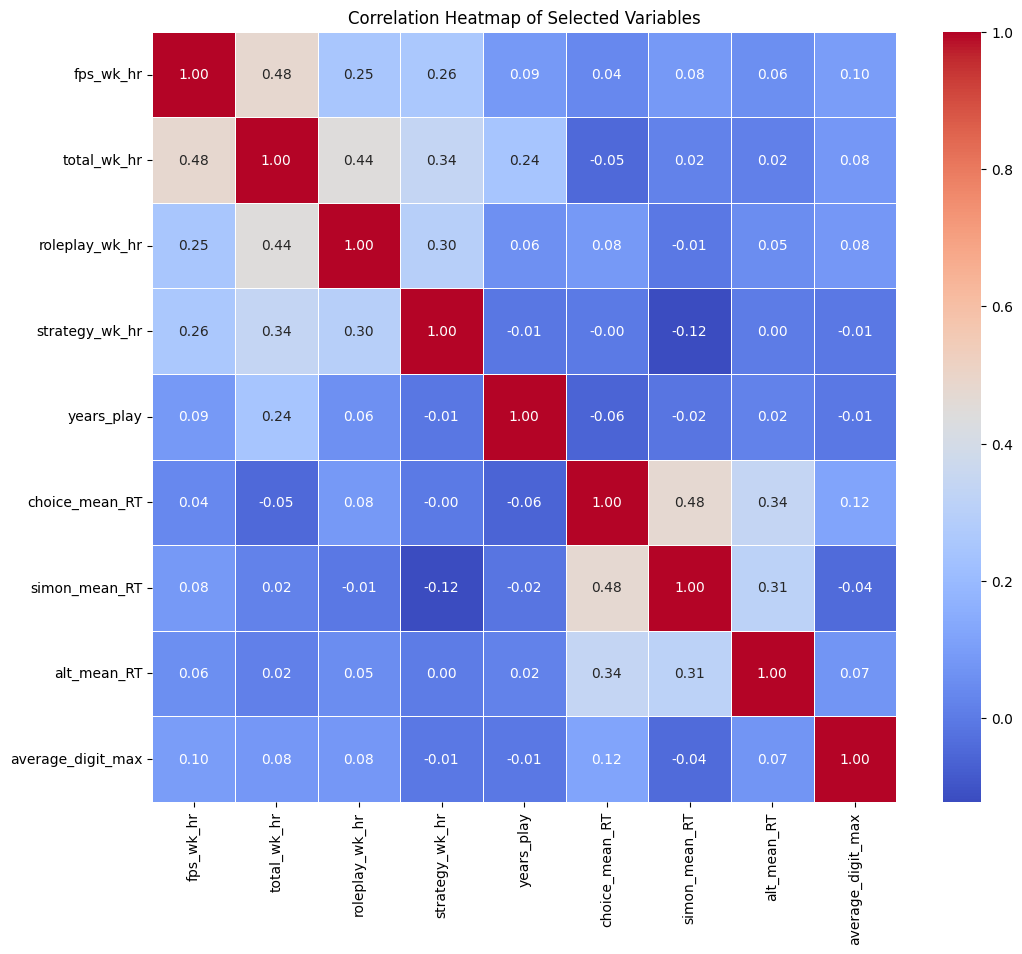

In [134]:
selected_variables = ['fps_wk_hr', 'total_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr',
                      'years_play', 'choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT', 
                      'average_digit_max']
selected_data = df[selected_variables]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

# Confounder Variables

In [135]:
confounders = ['years_play', 'gaming_ability_connection', 'media_reports']
df['intercept'] = 1
X = df[['group'] + confounders]
y = df['fps_wk_hr']
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:              fps_wk_hr   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              145.8
Date:                Sun, 24 Mar 2024   Prob (F-statistic):                    8.75e-56
Time:                        22:00:58   Log-Likelihood:                         -318.66
No. Observations:                 187   AIC:                                      645.3
Df Residuals:                     183   BIC:                                      658.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

3970.2657291675982


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1474/1795893970.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1474/1795893970.py:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1474/1795893970.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/kk/7w6727t942z6xwr_9

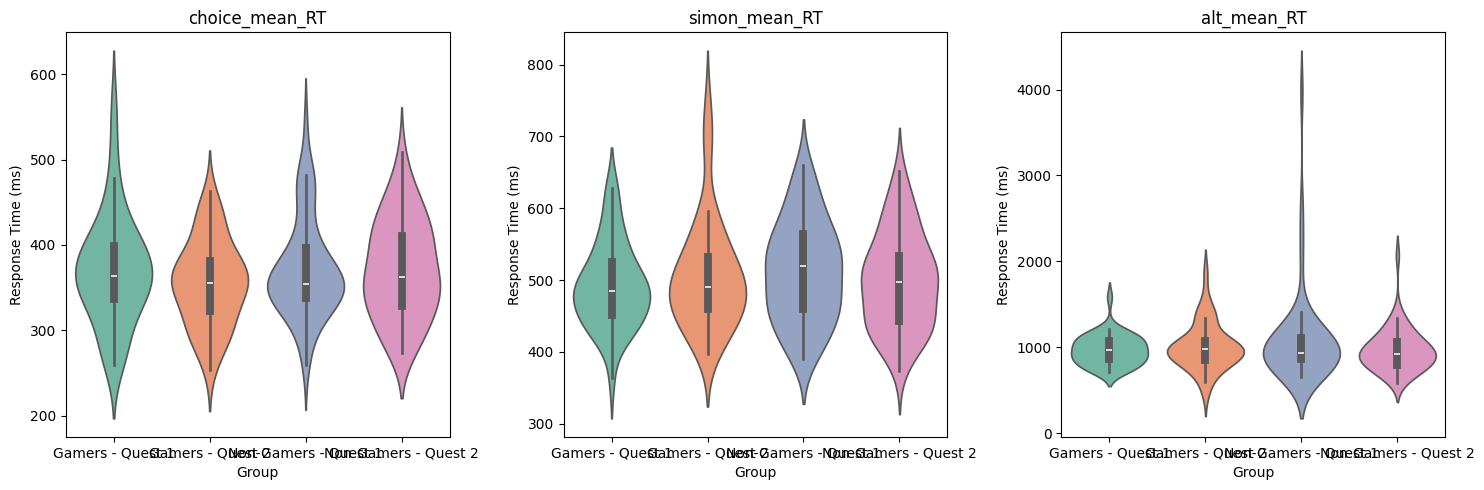

In [136]:
palette = sns.color_palette('Set2')

tasks = ['choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT']

print(max(df['alt_mean_RT']))
fig, axes = plt.subplots(nrows=1, ncols=len(tasks), figsize=(15, 5))

for i, task in enumerate(tasks):
    gamers_quest_1 = df[(df['group'] == 1) & (df['quest_timing'] == 1)]
    gamers_quest_2 = df[(df['group'] == 1) & (df['quest_timing'] == 2)]

    non_gamers_quest_1 = df[(df['group'] == 2) & (df['quest_timing'] == 1)]
    non_gamers_quest_2 = df[(df['group'] == 2) & (df['quest_timing'] == 2)]

    data = pd.concat([
        pd.DataFrame({'Group': 'Gamers - Quest 1', 'Response Time': gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Gamers - Quest 2', 'Response Time': gamers_quest_2[task]}),
        pd.DataFrame({'Group': 'Non-Gamers - Quest 1', 'Response Time': non_gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Non-Gamers - Quest 2', 'Response Time': non_gamers_quest_2[task]})
    ])
    sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)

    axes[i].set_title(task)
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Response Time (ms)')

plt.tight_layout()
plt.show()

# Alternate task switching task including all data

In [137]:
df = pd.read_excel('data.xlsx')

In [138]:
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Calculate the mean and standard deviation RT for each [group, quest_timing] combination
group_quest_stats = filtered_df.groupby(['group', 'quest_timing'])['alt_mean_RT'].agg(['mean', 'std']).reset_index()

# Format the results in the desired format
group_quest_stats['mean_std_format'] = group_quest_stats.apply(lambda row: f"{row['mean']:.2f} ± {row['std']:.2f} ms", axis=1)

# Print the formatted results
print(group_quest_stats[['group', 'quest_timing', 'mean_std_format']])


   group  quest_timing      mean_std_format
0      1             1   972.17 ± 176.93 ms
1      1             2  1012.71 ± 272.02 ms
2      2             1  1081.71 ± 536.89 ms
3      2             2   968.61 ± 251.27 ms


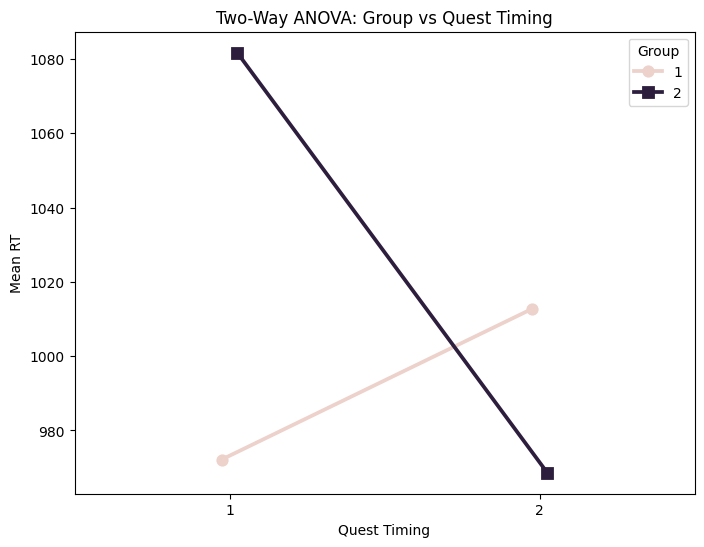

In [139]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=group_quest_stats, x='quest_timing', y='mean', hue='group', dodge=True,
              errorbar='sd', capsize=0.1, markers=['o', 's'])
plt.title('Two-Way ANOVA: Group vs Quest Timing')
plt.xlabel('Quest Timing')
plt.ylabel('Mean RT')
plt.legend(title='Group')
plt.show()

In [140]:
from scipy.stats import f_oneway, ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
group_2_data = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']

# One-way ANOVA for group effect
f_statistic_group, p_value_group = f_oneway(group_1_data, group_2_data)

# Independent t-test for quest timing effect
quest_timing_1_data = filtered_df[filtered_df['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data = filtered_df[filtered_df['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing, p_value_quest_timing = ttest_ind(quest_timing_1_data, quest_timing_2_data)

# Calculate effect sizes (Cohen's d) for group and quest timing effects
mean_group_1 = group_1_data.mean()
mean_group_2 = group_2_data.mean()
std_pooled_group = ((len(group_1_data) - 1) * group_1_data.std() ** 2 + (len(group_2_data) - 1) * group_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_group = (mean_group_1 - mean_group_2) / std_pooled_group

mean_quest_timing_1 = quest_timing_1_data.mean()
mean_quest_timing_2 = quest_timing_2_data.mean()
std_pooled_quest_timing = ((len(quest_timing_1_data) - 1) * quest_timing_1_data.std() ** 2 + (len(quest_timing_2_data) - 1) * quest_timing_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_quest_timing = (mean_quest_timing_1 - mean_quest_timing_2) / std_pooled_quest_timing

# Print results
print(f"Group Effect: F({len(filtered_df['group'].unique()) - 1}, {len(filtered_df) - len(filtered_df['group'].unique())}) = {f_statistic_group:.2f}, p = {p_value_group:.4f}, effect size = {effect_size_group:.2f}")
print(f"Quest Timing Effect: t({len(filtered_df) - 2}) = {t_statistic_quest_timing:.2f}, p = {p_value_quest_timing:.4f}, effect size = {effect_size_quest_timing:.2f}")


Group Effect: F(1, 185) = 0.41, p = 0.5244, effect size = -0.00
Quest Timing Effect: t(185) = 0.94, p = 0.3489, effect size = 0.00


In [141]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Quest Timing Effect in Group 1: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Quest Timing Effect in Group 2: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Quest Timing Effect in Group 1: t(77) = -0.78, p = 0.4360
Quest Timing Effect in Group 2: t(106) = 1.39, p = 0.1664


In [142]:
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Perform two-way ANOVA
formula = 'alt_mean_RT ~ C(group) * C(quest_timing)'
model = ols(formula, filtered_df).fit()
anova_table = anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                                sum_sq     df         F    PR(>F)
C(group)                  4.896119e+04    1.0  0.390857  0.532628
C(quest_timing)           1.085263e+05    1.0  0.866364  0.353190
C(group):C(quest_timing)  2.691757e+05    1.0  2.148827  0.144395
Residual                  2.292374e+07  183.0       NaN       NaN


# Beliefs about a connection between playing video games and the ability to perform cognitive-motor tasks

In [143]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'gaming_ability_connection']]

# Separate the data for gamers and non-gamers
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']

# Perform independent t-test
t_statistic, p_value = ttest_ind(gamers_data, non_gamers_data)

# Calculate Cohen's d effect size
mean_gamers = gamers_data.mean()
mean_non_gamers = non_gamers_data.mean()
std_pooled = ((len(gamers_data) - 1) * gamers_data.std() ** 2 + (len(non_gamers_data) - 1) * non_gamers_data.std() ** 2) / (len(filtered_df) - 2)
effect_size = (mean_gamers - mean_non_gamers) / std_pooled

# Print results
print(f"Independent t-test: t({len(filtered_df) - 2}) = {t_statistic:.2f}, p = {p_value:.2f}, Cohen’s d = {effect_size:.2f}")
print(f"Mean response for gamers: {mean_gamers:.2f} ± {gamers_data.std():.2f}")
print(f"Mean response for non-gamers: {mean_non_gamers:.2f} ± {non_gamers_data.std():.2f}")
print(f"Median for both groups: {gamers_data.median()}")


Independent t-test: t(185) = 1.95, p = 0.05, Cohen’s d = 0.17
Mean response for gamers: 8.10 ± 1.70
Mean response for non-gamers: 7.62 ± 1.64
Median for both groups: 8.0


# Choice RT task 

In [144]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'choice_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Quest Timing Effect in Group 1: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Quest Timing Effect in Group 2: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Quest Timing Effect in Group 1: t(77) = 1.18, p = 0.2432
Quest Timing Effect in Group 2: t(106) = -0.03, p = 0.9794


# Simon Task

In [145]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'simon_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Quest Timing Effect in Group 1: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Quest Timing Effect in Group 2: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Quest Timing Effect in Group 1: t(77) = -0.93, p = 0.3578
Quest Timing Effect in Group 2: t(106) = 0.98, p = 0.3278
